In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [109]:
def split_TR_TS(input, output):
    X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
    print("Train Split report:")
    print(f"X_train:{X_train.shape}")
    print(f"y_train:{y_train.shape}")

    print("\nTest Split report:")
    print(f"X_test:{X_test.shape}")
    print(f"y_test:{y_test.shape}")

    return X_train, X_test, y_train, y_test

def std_scaler_transform(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

def predict_data(X_train, y_train, algo):
    algo.fit(X_train, y_train)
    prediction = algo.predict(X_train)

    print(classification_report(y_train, prediction))
    return prediction

In [67]:
path = "../Dataset/diabetes.csv"
data = pd.read_csv(path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [68]:
COLS = ["BloodPressure", "Glucose", "Age", "Outcome"]
final_data = data[COLS]
final_data

,BloodPressure,Glucose,Age,Outcome
0,72,148,50,1
1,66,85,31,0
2,64,183,32,1
3,66,89,21,0
4,40,137,33,1
...,...,...,...,...
763,76,101,63,0
764,70,122,27,0
765,72,121,30,0
766,60,126,47,1


In [69]:
final_data.duplicated().sum()

3

In [70]:
final_data = final_data.drop_duplicates(keep="last")

# Simple EDA

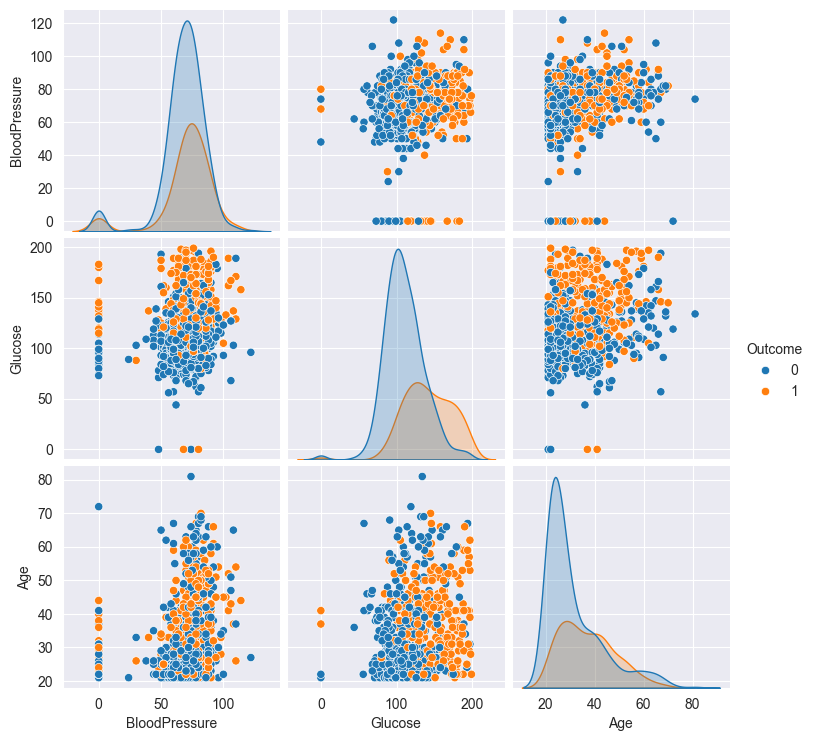

In [71]:
sns.pairplot(data= final_data, hue="Outcome")

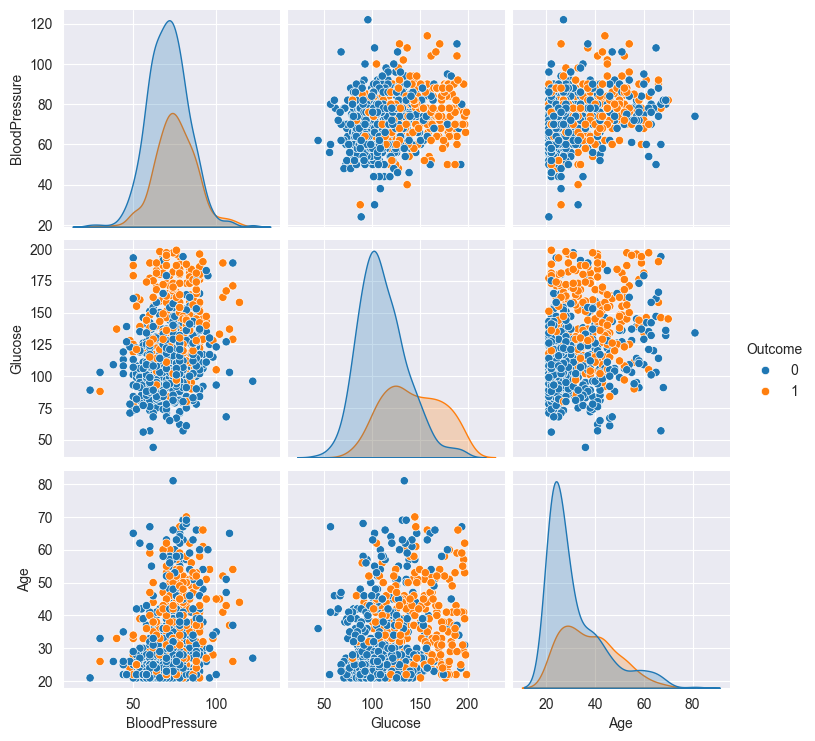

In [72]:
## only include legitimate data
cleaned_data = final_data.query("BloodPressure > 0 & Glucose > 0 & Age > 0")
sns.pairplot(data=cleaned_data, hue="Outcome")

# Class Balance

In [73]:
cleaned_data["Outcome"].value_counts()

Outcome
0    475
1    250
Name: count, dtype: int64

In [74]:
count_nonDia, count_Dia = cleaned_data["Outcome"].value_counts().values[0], cleaned_data["Outcome"].value_counts().values[1]

In [75]:
print(f"Ratio of non-diabetes and diabetes class: {round(count_Dia / count_nonDia, 2)}")

Ratio of non-diabetes and diabetes class: 0.53


# Split input output

In [76]:
X = cleaned_data.drop(columns="Outcome") ; y = cleaned_data["Outcome"]
X.head()

,BloodPressure,Glucose,Age
0,72,148,50
1,66,85,31
2,64,183,32
3,66,89,21
4,40,137,33


In [77]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Split Train Test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"\nX_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (580, 3)
y_train shape: (580,)

X_test shape: (145, 3)
y_test shape: (145,)


# dummy Modelling

In [79]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

clf_dummy = DummyClassifier(strategy="most_frequent", random_state=42)
clf_dummy.fit(X_train, y_train)

y_train_pred_dum = clf_dummy.predict(X_train)
print(classification_report(y_train, y_train_pred_dum))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       374
           1       0.00      0.00      0.00       206

    accuracy                           0.64       580
   macro avg       0.32      0.50      0.39       580
weighted avg       0.42      0.64      0.51       580



E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**Baseline Prior Class Probability in Training Data**

- calculate probability of each class
- calculate proportion of each class in training data
- calculate class odds based on prior probability

In [80]:
y_test.value_counts(normalize=True)

Outcome
0    0.696552
1    0.303448
Name: proportion, dtype: float64

In [81]:
proportion_majority = y_train.value_counts(normalize=True).values[0].round(3)
proba_majority = y_test.value_counts(normalize=True).values[0].round(3)

odds_majority = proportion_majority * proba_majority
odds_majority

0.449565

In [82]:
proportion_minority = y_train.value_counts(normalize=True).values[1].round(3)
proba_minority = y_test.value_counts(normalize=True).values[1].round(3)

odds_minority = proportion_minority * proba_minority
odds_minority

0.107565

In [83]:
total_odds = odds_majority + odds_minority
print(f"Total odds is calculated at: {total_odds}")

Total odds is calculated at: 0.55713


other way to do is using the stratified strategy of DummyClassifier

In [84]:
clf_stra_dummy = DummyClassifier(strategy="stratified", random_state=42)
clf_stra_dummy.fit(X_train, y_train)

y_train_dum_stra = clf_stra_dummy.predict(X_train)
print(classification_report(y_train, y_train_dum_stra))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       374
           1       0.39      0.40      0.39       206

    accuracy                           0.56       580
   macro avg       0.52      0.53      0.53       580
weighted avg       0.56      0.56      0.56       580



# SVM Exploration

In [114]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

In [103]:
iris = datasets.load_iris()
X_ir = iris["data"][:, (2,3)] #  only include petal length and height
y_ir = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
df_ir = pd.DataFrame(X_ir, columns=["petal length", "petal width"])
df_ir["target"] = y_ir
df_ir.head()

,petal length,petal width,target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [104]:
df_ir["target"].value_counts()

target
0.0    100
1.0     50
Name: count, dtype: int64

In [105]:
X_ir = df_ir[["petal length", "petal width"]]
y_ir = df_ir["target"]

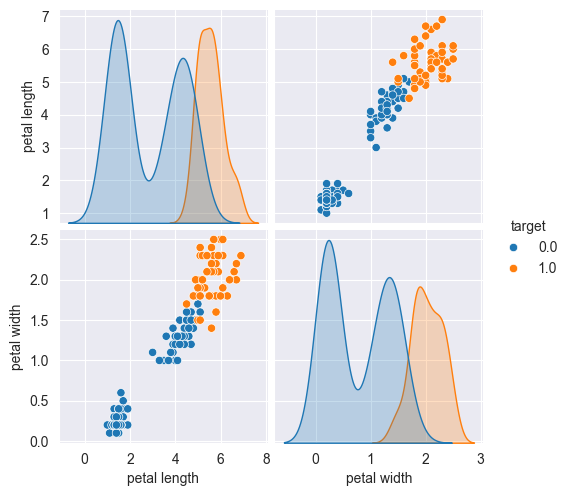

In [116]:
sns.pairplot(data=df_ir, hue="target")

In [106]:
X_ir_tr, X_ir_ts, y_ir_tr, y_ir_ts = split_TR_TS(X_ir, y_ir)

Train Split report:
X_train:(120, 2)
y_train:(120,)

Test Split report:
X_test:(30, 2)
y_test:(30,)


#### Linear SVC

In [112]:
clf_LinSVC = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

clf_LinSVC.fit(X_ir_tr, y_ir_tr)

y_ir_pred = predict_data(X_ir_tr, y_ir_tr, algo=clf_LinSVC)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        81
         1.0       0.92      0.90      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120



Eventough linear SVM can work exceptionally well in some cases, many datasets are not suitable to be linearly seperable. One Approach is to add more features such as polynomial

#### Polynomial SVC

In [115]:
clf_PolySVC = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("clf_PolySVC", LinearSVC(C=10, loss="hinge"))
])

clf_PolySVC.fit(X_ir_tr, y_ir_tr)

y_ir_poly_pred = predict_data(X_ir_tr, y_ir_tr, clf_PolySVC)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        81
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120



# Compare with SVM Method

In [89]:
from sklearn.svm import SVC

clf_svc = SVC(kernel="linear", C = 100)
clf_svc.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [90]:
predict_svm = clf_svc.predict(X_train)
print(classification_report(y_train, predict_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80       374
           1       0.66      0.53      0.59       206

    accuracy                           0.73       580
   macro avg       0.71      0.69      0.70       580
weighted avg       0.73      0.73      0.73       580

